### Instrucciones generales <a class="tocSkip"></a>

1. Forme un grupo de **máximo dos estudiantes**
1. Versione su trabajo usando un **repositorio <font color="red">privado</font> de github**. Agregue a su compañero y a su profesor (usuario github: phuijse) en la pestaña *Settings/Manage access*. No se aceptaran consultas si la tarea no está en github. No se evaluarán tareas que no estén en github.
1. Se evaluará el **resultado, la profundidad de su análisis y la calidad/orden de sus códigos** en base al último commit antes de la fecha y hora de entrega". Se bonificará a quienes muestren un método de trabajo incremental y ordenado según el histórico de *commits*
1. Sean honestos, ríganse por el [código de ética de la ACM](https://www.acm.org/about-acm/code-of-ethics-in-spanish)


# Tarea 1: Análisis de señales usando la FFT

Para esta tarea considere la señal adjunta guardada en el archivo `elefante_ruidoso.npy`

Esta señal tiene valores complejos y fue muestreada a $100$ [Hz]

In [95]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio
with open('elefante_ruidoso.npy', 'rb') as f:
    x = np.load(f)

In [96]:
#Frecuencia de muestreo es de 100[Hz]
Fs = 100

## Pregunta 1: Análisis preliminar (20%)

Responda
- ¿Cuántas muestras tiene la señal? ¿Cuál es la duración o largo temporal de la señal? 
- ¿Cuál es la mayor frecuencia que podemos estudiar usando transformada de Fourier en este caso? Fundamente su respuesta

Muestre 

- Una gráfica de linea (`plt.plot`) con las partes real e imaginaria de la señal en función del tiempo
- Una nube de puntos (`plt.scatter`) con la parte imaginaria de la señal en función de la parte real de la misma

Describa y clasifique la señal según los comportamientos que observa

In [97]:
#La señal tiene 2000 muestras
len(x)

2000

In [98]:
#la señal tienen una duracion de 20[s]
len(x)/Fs

20.0

In [99]:
#la mayor frecuencia que podemos estudiar usando transformada de Fourier en este caso es....

<IPython.core.display.Javascript object>


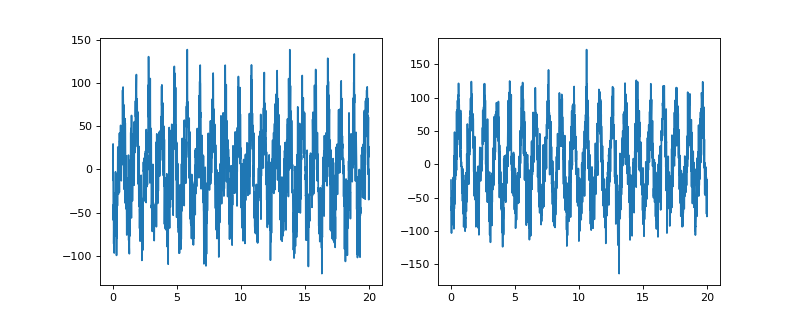

In [100]:
#grafiaca de parte real e imaginaria
fig, ax = plt.subplots(1, 2, figsize=(10, 4), dpi=80)
ax[0].plot(np.arange(1,2001)*0.01, x.real)
ax[1].plot(np.arange(1,2001)*0.01, x.imag)

<IPython.core.display.Javascript object>


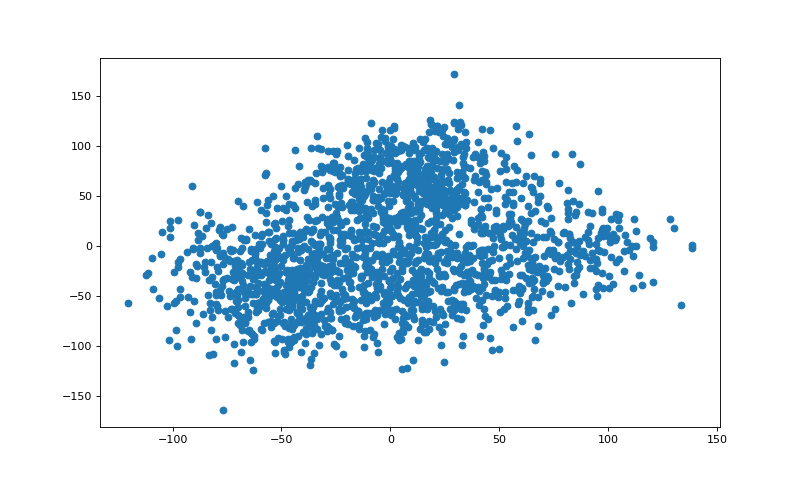

In [101]:
#nube de puntos
fig, ax = plt.subplots(1, 1, figsize=(10, 6), dpi=80)
ax.scatter(x=x.real,y=x.imag)

In [103]:
#Poco texto....
Audio(x, rate=Fs)

## Pregunta 2: Análisis de Fourier (40%)

- Escriba una función que reciba la señal y retorne el espectro de amplitud, el espectro de fase y las frecuencias asociadas a la señal. 
- Muestre dos gráficos con el espectro de amplitud y espectro de fase en función de la frecuencia, respectivamente. Comente sobre lo que observa
- Escriba una función que reciba un número entero $M$ y que retorne un espectro de magnitud modificado donde los $M$ componentes mayores se mantienen y todos los demás se hacen igual a cero, retorne también el índice de los $M$ componentes mayores
- Muestre graficamente el espectro de magnitud modificado con $M=7$. Imprima los valores de las **frecuencias, amplitudes y fases** de los $M$ componentes ordenados en orden descedente según su amplitud


In [104]:
import scipy.fft as sfft
S = sfft.fft(x)

In [105]:
freqs = sfft.fftfreq(len(S),1/Fs) 

In [106]:
#Espectro de Amplitud (SA)
SA = np.absolute(S)

#Espectro de Fase(SP)
SP = np.angle(S)

In [107]:
mask = (freqs > 0)&(SA > 7)
SP[mask]

array([ 2.75590094e+00, -1.07972513e+00,  1.19150824e+00, -1.35246446e+00,
       -1.87137664e+00,  1.17804006e-02,  2.12707618e+00,  1.59523767e+00,
        2.35935058e+00,  2.98507201e+00, -1.03441067e+00, -8.58456907e-01,
       -2.81266606e+00, -1.68431675e+00, -1.43963979e+00, -1.58202753e+00,
        2.16225102e+00, -1.86979794e+00,  1.65080596e+00, -2.82861611e+00,
       -2.33115777e+00, -1.96843582e+00,  2.96799181e+00, -1.49813488e+00,
       -3.12494479e+00,  2.60789277e+00, -2.96022382e+00,  1.71077156e+00,
        6.62840399e-01, -2.13766690e+00,  2.18186932e+00,  3.34246875e-01,
        8.14290501e-01, -2.58867928e+00, -3.57217473e-01,  1.43320238e+00,
        2.99385716e+00,  2.82161198e+00,  2.42387004e-01,  1.13605401e+00,
       -2.16290670e+00,  6.24995533e-01,  2.83552362e+00,  8.97122568e-01,
       -3.07592600e+00,  1.38870400e+00,  3.10508049e+00,  1.89711764e-01,
       -3.53376286e-01, -1.41259117e+00, -2.77489231e-01,  1.68903847e+00,
        1.95937215e+00,  

In [110]:
mask = np.argsort(SA[f>0])[-2:7]
f[f>0][mask]

TypeError: '>' not supported between instances of '_io.BufferedReader' and 'int'

<IPython.core.display.Javascript object>


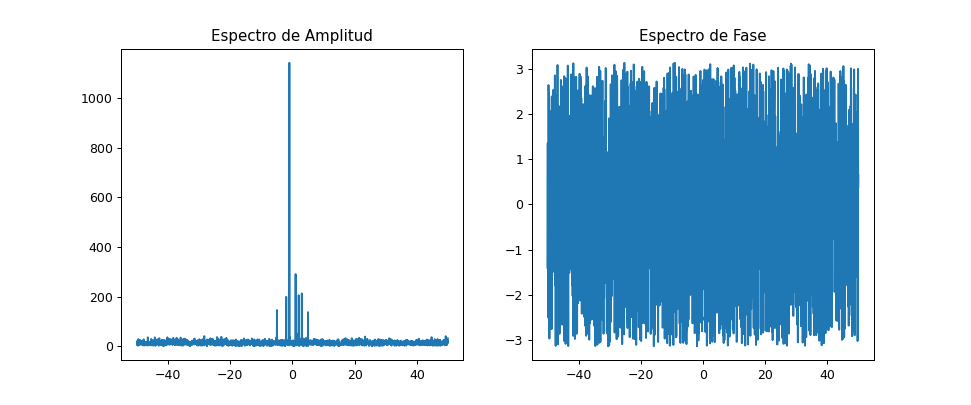

Text(0.5, 1.0, 'Espectro de Fase')

In [76]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), dpi=90)
ax[0].plot(sfft.fftshift(freqs), sfft.fftshift(SA)/100)
ax[0].set_title("Espectro de Amplitud")
ax[1].plot(sfft.fftshift(freqs), sfft.fftshift(SP))
ax[1].set_title("Espectro de Fase")

## Pregunta 3: Reconstrucción (40%)

Use la transformada de Fourier inversa para reconstruir la señal en base al espectro de amplitud modificado y el espectro de fase. 

Para $M=[100, 10, 7, 5, 3, 1]$ (puede usar otros valores si lo considera necesario en su análisis) muestre

- Una gráfica de linea (`plt.plot`) con las partes real e imaginaria de la señal reconstruida en función del tiempo
- Una nube de puntos (`plt.scatter`) con la parte imaginaria en función de la parte real de la señal reconstruida

Describa y comente lo que observa, en particular compare cada resultado con el caso `M=len(x)` (caso original) y discuta sobre lo que ocurre para $M>7$, $M=7$ y $M<7$ con respecto al ruido y la información relevante de la señal ¿Pueden ver al elefante en el ruido? 

## Indicaciones

- Puede usar las funciones `np.real` e `np.imag` para obtener la parte real e imaginaria de un número complejo, respectivamente
- Si `x` y `y` son la parte real e imaginaria de un número complejo, puedes reconstruir el número complejo con `c = x + 1j*y`
- Si `rho` y `phi` son la amplitud y ángulo de un número complejo, puedes reconstruir el número complejo usando `c = rho*np.exp(1j*phi)`
- Recuerden que un slice de un `ndarray` no es una copia sino una referencia. Para crear copias use el atributo `.copy()`
- Usa `scipy.fft.fft` y `scipy.fft.ifft` para calcular la FFT directa e inversa, respectivamente

## Éxito!

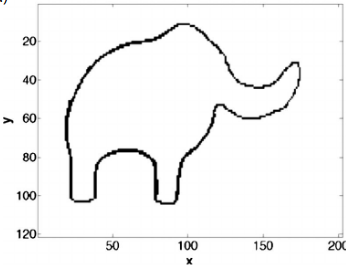